In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
original_df = pd.read_csv('train.csv')
preprocessed = pd.read_csv('comments_preprocessed_final.csv')

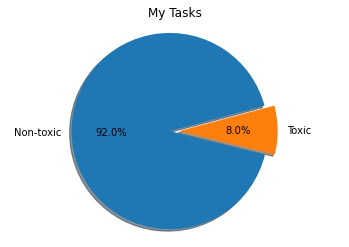

In [4]:
# Class label distribution
Tasks = [92,8]
my_labels = 'Non-toxic','Toxic'
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

In [5]:
original_df = original_df.set_index('id').copy()
preprocessed = preprocessed.set_index('id').copy()

In [6]:
meta_data = original_df.loc[preprocessed.index]
meta_data['target'] = preprocessed['target']

In [7]:
COLUMNS = ['target', 'female', 'male', 'asian', 'black', 
           'psychiatric_or_mental_illness', 'homosexual_gay_or_lesbian']
meta_data = meta_data[COLUMNS]

In [8]:
meta_data2 = meta_data.where(meta_data > 0.5, other=0)
meta_data2 = meta_data2.where(meta_data <= 0.5, other=1)

In [9]:
df = meta_data2.groupby(["target", "female"])['male'].count().reset_index()
df1 = df[df['female'] == 1.0].drop(columns=['female']).rename(columns={'male':'count'})
df1['identity'] = ['female', 'female']
df1

,target,count,identity
1,0,1313649,female
3,1,102923,female


In [10]:
df = meta_data2.groupby(["target", "male"])['female'].count().reset_index()
df2 = df[df['male'] == 1.0].drop(columns=['male']).rename(columns={'female':'count'})
df2['identity'] = ['male', 'male']
df2

,target,count,identity
1,0,1304100,male
3,1,102042,male


In [12]:
df = meta_data2.groupby(["target", "black"])['male'].count().reset_index()
df4 = df[df['black'] == 1.0].drop(columns=['black']).rename(columns={'male':'count'})
df4['identity'] = ['black', 'black']
df4

,target,count,identity
1,0,1279643,black
3,1,100502,black


In [13]:
df = meta_data2.groupby(["target", "psychiatric_or_mental_illness"])['male'].count().reset_index()
df5 = df[df['psychiatric_or_mental_illness'] == 1.0].drop(columns=['psychiatric_or_mental_illness']).rename(columns={'male':'count'})
df5['identity'] = ['psych_mental', 'psychor_mental']
df5

,target,count,identity
1,0,1273532,psych_mental
3,1,96931,psychor_mental


In [14]:
df = meta_data2.groupby(["target", "homosexual_gay_or_lesbian"])['male'].count().reset_index()
df6 = df[df['homosexual_gay_or_lesbian'] == 1.0].drop(columns=['homosexual_gay_or_lesbian']).rename(columns={'male':'count'})
df6['identity'] = ['homosexual', 'homosexual']
df6

,target,count,identity
1,0,1277533,homosexual
3,1,99043,homosexual


In [17]:
frames = [df1, df2, df4, df5, df6]
result = pd.concat(frames)

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

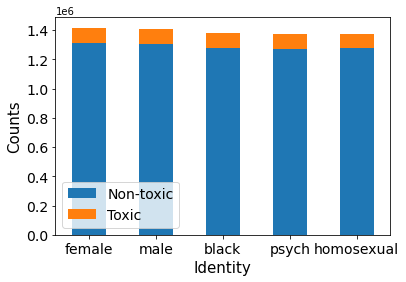

In [20]:
# Toxic & non-toxic comment values by identity
target_1 = [102923,102042, 100502, 96931, 99043]
target_0 = [1313649, 1304100, 1279643, 1273532, 1277533]
index = ['female', 'male', 'black', 
           'psych', 'homosexual']
df = pd.DataFrame({'Non-toxic': target_0,
                   'Toxic': target_1}, index=index)
ax = df.plot.bar(rot=0, stacked=True)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Identity', fontsize = 15)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
result = df1.merge(df2, on = 'target')
result = result.merge(df3, on = 'target')
result = result.merge(df4, on = 'target')
result = result.merge(df5, on = 'target')
result = result.merge(df6, on = 'target')
result